## Task 1: Rating Prediction using ML

### Project Summary: Predicting Restaurant Ratings with ML

In this project, I analyzed a restaurant dataset to predict ratings using machine learning. The journey covered data cleaning, outlier treatment, feature encoding, and model evaluation. I compared a Linear Regression and a Decision Tree Regressor, and found that the Decision Tree outperformed with an R² of 0.92, capturing non-linear relationships effectively.
- Top insight: Votes were by far the most influential feature in predicting restaurant ratings.
- Key Steps:
    - Exploratory Data Analysis with visualizations (heatmap, pairplot)
    - Outlier handling using IQR + log transformation
    - Feature encoding (Top-N cuisines, frequency encoding for cities, label encoding)
    - Model evaluation (R², MSE, MAE, RMSE)
    - Feature importance analysis for stakeholder insights


In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


- Data Definition
    - This dataset appears to be a restaurant listing with various attributes describing each restaurant. Each row represents a different restaurant, and each column contains specific information about that restaurant.

- Columns and Their Meanings
    - __Restaurant ID:__ A unique identifier for each restaurant.
    - __Restaurant Name:__ The name of the restaurant.
    - __Country Code:__ Numeric code representing the country (162 in all rows, likely referring to the Philippines).
    - __City:__ The city where the restaurant is located.
    - __Address:__ The full address of the restaurant.
    - __Locality:__ A more specific area or neighborhood within the city.
    - __Locality Verbose:__ A detailed description of the locality.
    - __Longitude:__ The geographic longitude coordinate.
    - __Latitude:__ The geographic latitude coordinate.
    - __Cuisines:__ Types of cuisines offered (e.g., Japanese, French, Seafood).
    - __Average Cost for two:__ Average cost for two people (in the listed currency).
    - __Currency:__ The currency in which the cost is listed 
    - __Has Table Booking:__ Indicates if the restaurant accepts table bookings (Yes/No).
    - __Has Online Delivery:__ Indicates if the restaurant offers online delivery (Yes/No).
    - __Is Delivering Now:__ Indicates if the restaurant is currently delivering (Yes/No).
    - __Switch to Order Menu:__ Likely an internal flag for the ordering system (Yes/No).
    - __Price Range:__ A numeric value indicating the price category (e.g., 1 = low, 4 = high).
    - __Aggregate Rating:__ The overall rating of the restaurant (out of 5).
    - __Rating Color:__ The color code associated with the rating (e.g., Dark Green for high ratings).
    - __Rating Text:__ The qualitative description of the rating (e.g., Excellent, Very Good).
    - __Votes:__ The number of people who have rated the restaurant.



- __Load the Data__

In [ ]:
# Load the dataset from a CSV file
df_rating= pd.read_csv('Dataset.csv',)
df_rating.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Check the rows and columns of the dataset
df_rating.shape

(9551, 21)

In [ ]:
# Check the data types and non-null values in the dataset
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

- Check Null Values

In [ ]:
# Check for missing values in the dataset
df_rating.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

- Handle Missing(Null) value

In [ ]:
# Fill missing values in 'Cuisines' column with the mode of the column
df_rating['Cuisines'] = df_rating['Cuisines'].fillna(df_rating['Cuisines'].mode()[0])

In [ ]:
# Check again for missing values in the dataset
df_rating.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

- Check for Duplicate values

In [ ]:
# Check for duplicates
df_rating.duplicated().sum()

0

- __Understanding Feature Influence on Restaurant Ratings__

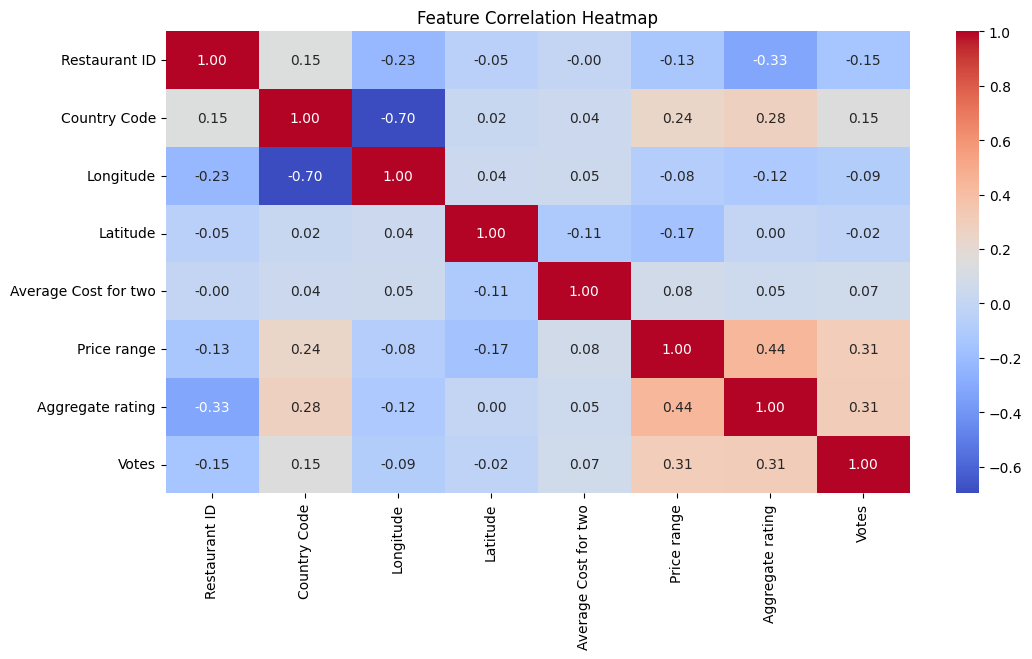

In [ ]:
# heatmap to visualize the correlation between features and the target variable
numeric_cols = df_rating.select_dtypes(include=["number"])
# Plotting the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

- Observation
    - Price Range & Aggregate Rating (0.44 correlation)
        - Moderate positive relationship 
        - price category may influence ratings.
    - Votes & Aggregate Rating (0.36 correlation)
        - More votes typically lead to more reliable ratings.

    - Longitude & Country Code (-0.70 correlation)
        - Negative correlation suggests they don’t strongly influence restaurant ratings.
    - Latitude & Aggregate Rating (~0 correlation)
        - No meaningful relationship detected


- Pairplot to check non linear relationship

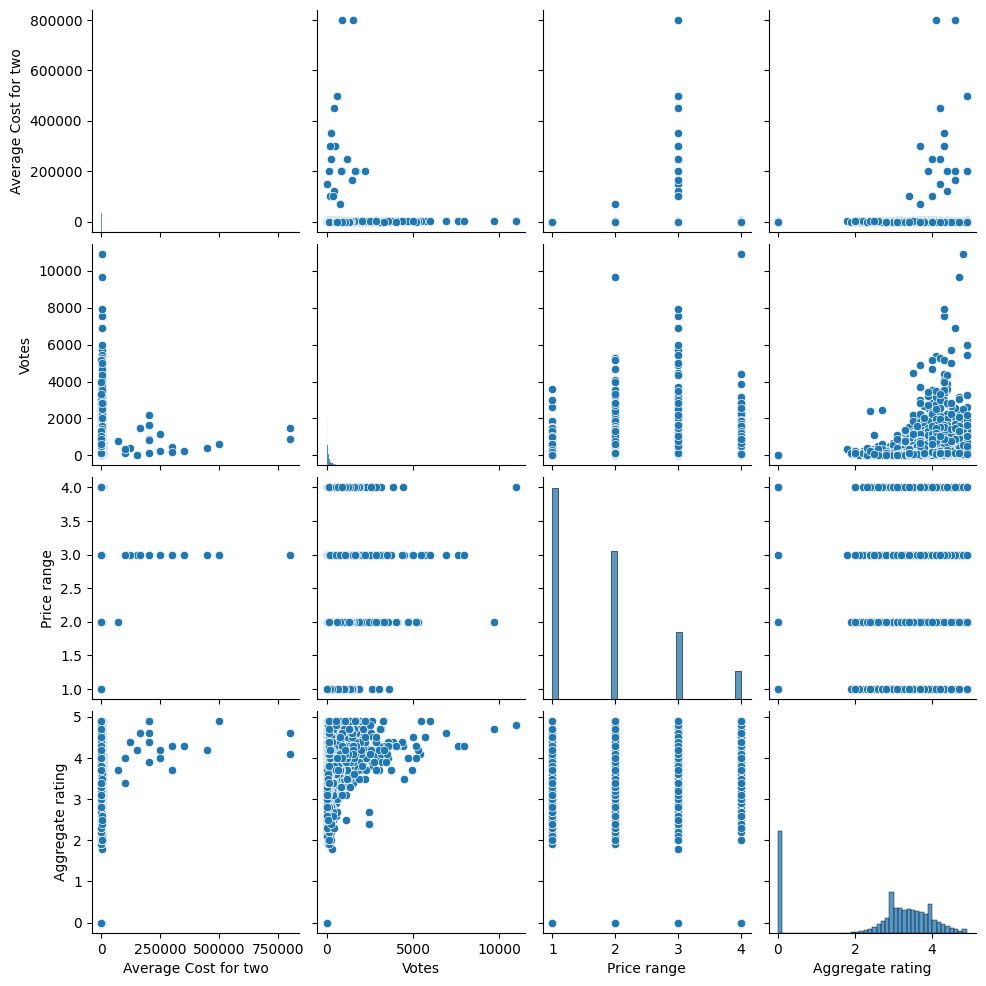

In [ ]:
# Select only numeric columns for pairplot
numeric_features = ["Average Cost for two", "Votes", "Price range", "Aggregate rating"]
sns.pairplot(df_rating[numeric_features]) # Pairplot to visualize relationships
plt.show()

- Observation
    - Votes vs. Aggregate Rating
        - Appears positively correlated—restaurants with more votes tend to have higher ratings.
    - Price Range vs. Aggregate Rating
        - Slight upward trend—higher-priced restaurants may receive better ratings.
    - Average Cost for Two vs. Aggregate Rating
        - No strong pattern, suggesting cost alone may not determine ratings.
    - Outliers
        - Some extreme values in Votes or Average Cost for Two these should be checked.


In [ ]:
# Display the columns of the DataFrame for reference
df_rating.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
# Select relevant features for the model
df_model = df_rating[["Average Cost for two", "Votes", "Price range", "Has Table booking", "Has Online delivery", "City", "Locality", "Cuisines", "Rating text","Aggregate rating"]]

In [ ]:
# statistics before removing outliers
print(df_model.describe())

       Average Cost for two         Votes  Price range  Aggregate rating
count           9551.000000   9551.000000  9551.000000       9551.000000
mean            1199.210763    156.909748     1.804837          2.666370
std            16121.183073    430.169145     0.905609          1.516378
min                0.000000      0.000000     1.000000          0.000000
25%              250.000000      5.000000     1.000000          2.500000
50%              400.000000     31.000000     2.000000          3.200000
75%              700.000000    131.000000     2.000000          3.700000
max           800000.000000  10934.000000     4.000000          4.900000


- __Average Cost for two__:
    - Mean ₹1199 vs. median ₹400 → clear skew.
    - Max value ₹800,000 is anomaly.
    - Standard deviation is absurdly high at ₹16,121.
- __Votes__:
    - Median is just 31, but max reaches 10,934.
    - Standard deviation (~430) is nearly triple the mean.
- __Next Step__
    - Remove extreme outliers from Average Cost for two using IQR method
    - Cap (Winsorize) both Votes and cost within 5–95th percentiles
    - Log transform both features to normalize scale



- __Outliers Detection__

In [615]:
# Function to detect outliers using boxplot
def plot_outlier_detection(df, plot_type='boxplot'):
    # Create a single row with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Loop through subplots
    for ax, feature in zip(axes, df.columns):
        if plot_type == 'boxplot':
            # Create a boxplot for each feature
            sns.boxplot(y=df[feature], ax=ax)
            ax.set_title(f"Boxplot of {feature}")
        elif plot_type == 'histplot':
            # Create a histogram for each feature
            sns.histplot(df[feature], ax=ax, bins=100, kde=True)
            ax.set_title(f"Histogram of {feature}")
        elif plot_type == 'both':
            sns.boxplot(y=df[feature], ax=ax)
            ax.set_title(f"Boxplot of {feature}")
            plt.figure()
            sns.histplot(df[feature], bins=100, kde=True)
            plt.title(f"Histogram of {feature}")
    plt.tight_layout()
    plt.show()

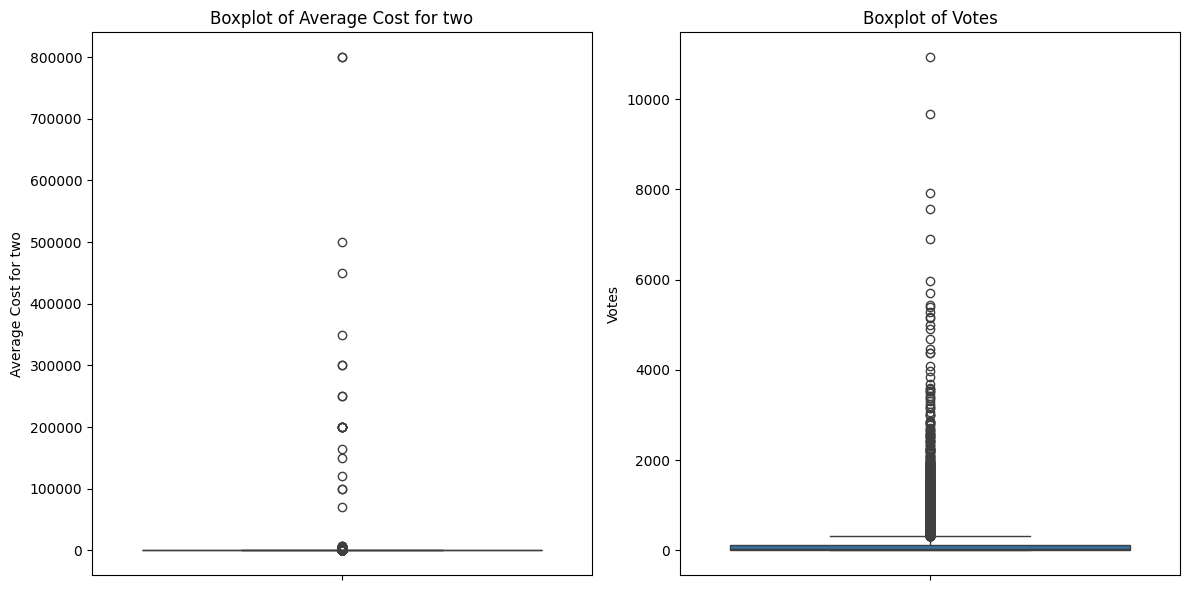

In [ ]:
# plot outliers using boxplot
plot_outlier_detection(df_model)

- Observations
    - __Average Cost for Two__
        - Extremely high outliers reaching 800,000
    - __Votes__
        - Most values are low, but a few restaurants have votes near 10,000
    - __Price range__
        - More balanced

- __Handling Outliers__


In [ ]:
# Function to remove outliers using IQR method
def remove_iqr_outliers(df, col):
    Q1 = df[col].quantile(0.25) # First quartile
    Q3 = df[col].quantile(0.75) # Third quartile
    IQR = Q3 - Q1 # Interquartile range
    lower = Q1 - 1.5 * IQR # Lower bound
    upper = Q3 + 1.5 * IQR # Upper bound
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Remove outliers from specified columns
for col in ["Average Cost for two", "Votes"]:
    df_model = remove_iqr_outliers(df_model, col)

- Check Describe Statistics after IQR Outlier Removal

In [ ]:
# statistics after removing outliers
print(df_model.describe())

       Average Cost for two        Votes  Price range  Aggregate rating
count           7685.000000  7685.000000  7685.000000       7685.000000
mean             426.391932    43.888744     1.552635          2.373429
std              257.744369    57.880810     0.708941          1.525335
min                0.000000     0.000000     1.000000          0.000000
25%              250.000000     3.000000     1.000000          0.000000
50%              400.000000    17.000000     1.000000          3.000000
75%              600.000000    64.000000     2.000000          3.400000
max             1350.000000   251.000000     4.000000          4.900000


- Average Cost for two:
    - Ranges from ₹0 to ₹1350, with a median of ₹400.
    - Distribution is right-skewed, but extreme high-cost outliers have been removed
- Votes:
    - Median votes = 17, with most restaurants receiving between 3 and 64 votes

- Re-plot the boxplots after outlier removal

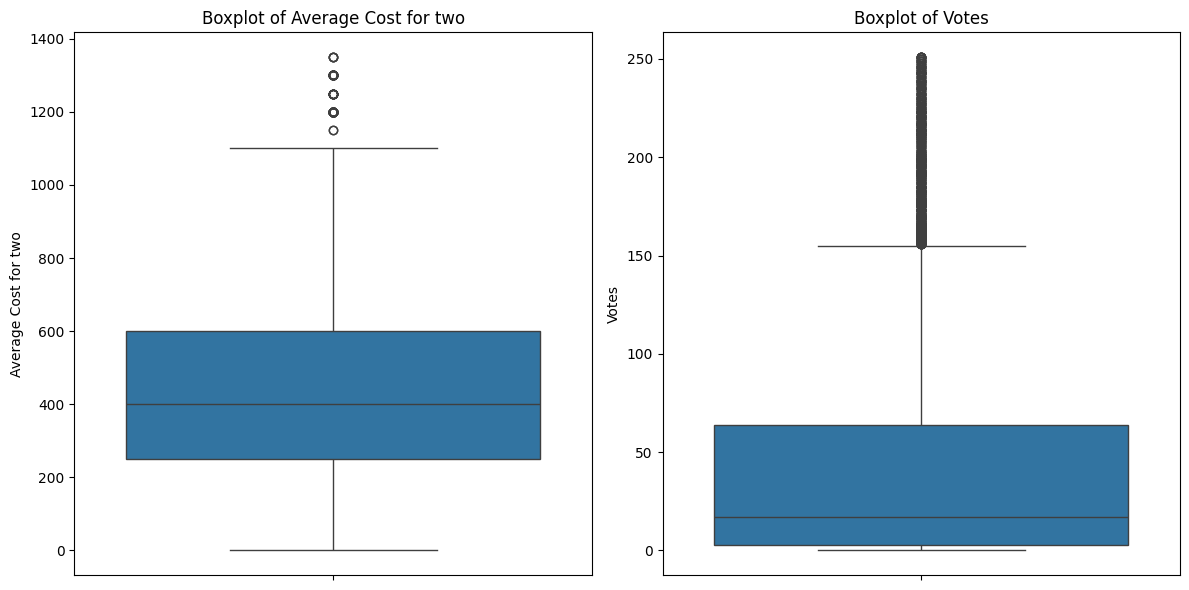

In [ ]:
# Re-plot the outlier detection after removing outliers
plot_outlier_detection(df_model)

- Observation 
    - Boxplot of Average Cost for two: 
        - The distribution is right-skewed
        - Median around ₹400 and most data points lie between ₹200 and ₹600 (IQR)
        - There are many extreme outliers beyond ₹1000
    - Boxplot of Votes:
        - The votes feature shows strong right skewness
        - median near 50 votes and many outliers goes up to 250.

- __Log transformation__
    - For reduces skewness
    - used log1p beacuse data has zero value


In [ ]:
# log1p transformation for skewed features
df_model['Average Cost for two'] = np.log1p(df_model['Average Cost for two'])
df_model['Votes'] = np.log1p(df_model['Votes'])

- Visualizing Distribution Changes After Log Transformation

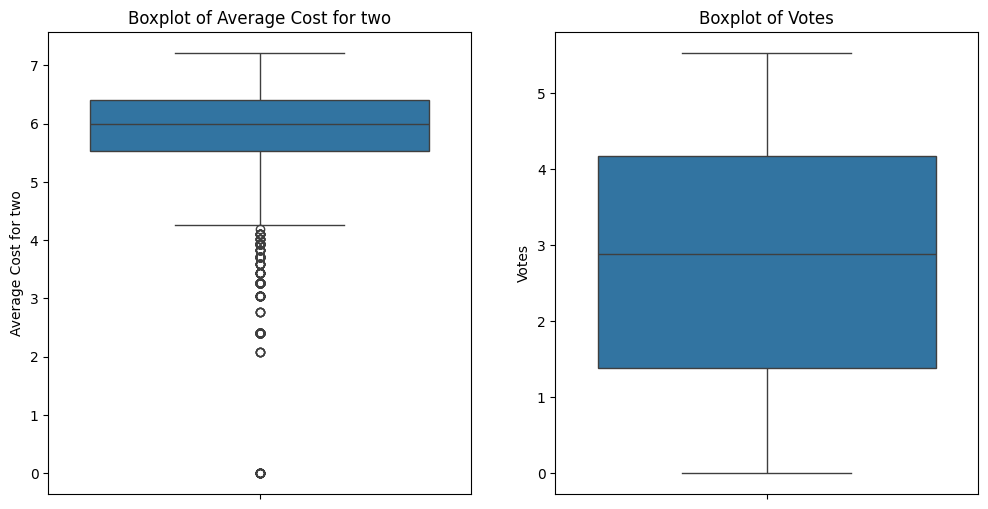

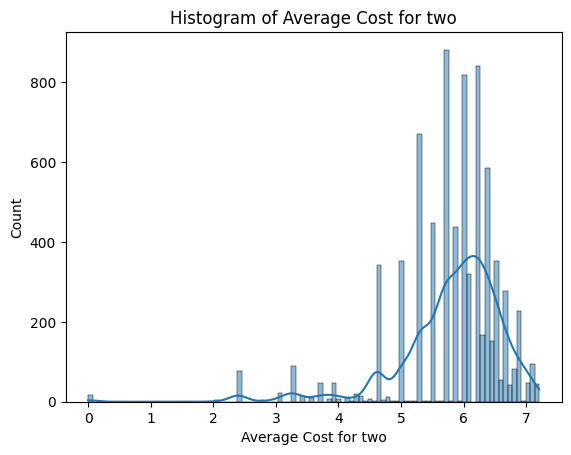

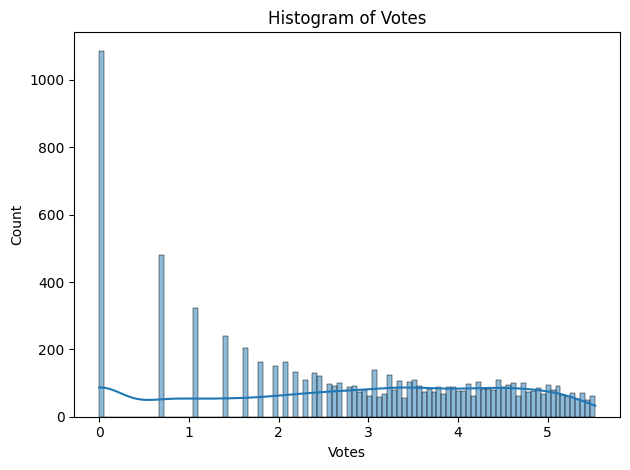

In [ ]:
# call the outlier detection function again to visualize the changes
plot_outlier_detection(df_model, plot_type='both')


- Average Cost for two:
    - Boxplot - After log transformation, you’ve achieved a centered distribution with very few lower-end outliers (log values between 0 and 4).
    - Histplot - Most of the log-transformed values are concentrated between 5 and 7, with a smooth peak around 6

- Votes:
    - Boxplot - The distribution is tight and centered with no visible outliers.
    - Histplot - Many restraurant having no review at all that splike at 0



- __Encoding__

In [ ]:
# Function for checking for unique values in categorical columns
def unique_values_count(df, columns):
    for col in columns:
        count = df[col].nunique()
        print(f"{col}: {count} unique values")


In [623]:
# checking unique values for categorical columns
unique_values_count(df_model, df_model.select_dtypes(include=['object']).columns)

Has Table booking: 2 unique values
Has Online delivery: 2 unique values
City: 113 unique values
Locality: 817 unique values
Cuisines: 1161 unique values
Rating text: 6 unique values


- __Rating text__
    - 'Rating text' can be ordinal encoded for EDA, it should not be used as a feature in training to avoid __target leakag__
- __Has Table booking__ and __Has Online delivery__
    -  Label Encoding (Yes → 1, No → 0)
- __Locality__
    - 817 unique values means *High cardinality* and has many rare locations
    - In many cases, locality is nested within city, so city may already capture much of the relevant geographic signal.
    - So droping this column
- __Cuisines__ - Top-N Encoding
    - 1161 unique values means *High cardinality*
    - Some cuisines may be more popular in specific cities, can affect restaurant rating.
    - we can't drop it so Keep Top 20 + others
- __City__ - Frequency Encoding
    - Moderate cardinality
    - Cover the broader geographic area and correlate with customer preference


In [673]:
# copy the model dataframe for encoding
df_encode = df_model.copy()

In [ ]:
# checking row and column of the dataframe before encoding
df_encode.shape

(7685, 10)

In [674]:
# Function to encode categorical columns
def encode_cat_columns(df):
    
    # drop the unwanted columns first
    df = df.drop('Locality', axis=1)
    df = df.drop('Rating text', axis=1)
    
    # Binary encoding 
    df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
    df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
    
    # frequency encoding for 'City'
    city_freq = df['City'].value_counts().to_dict() # get frequency of each city in dictionary form
    df['City_freq'] = df['City'].map(city_freq) # replacing each city name (key) with its frequency(value) from the dictionary.
    # drop the original 'City' column
    df = df.drop('City', axis=1)
    
    # Top N Cuisines Encoding
    # Extract the first listed cuisine to reduce complexity in multi-cuisine entries
    df['Cuisines'] = df['Cuisines'].str.split(',').str[0].str.strip()
    # identify the top 20 most frequent cuisines in the dataset
    top_cuisines = df['Cuisines'].value_counts().head(20).index
    #Replace less common cuisines with 'Other' to reduce sparsity
    df['Cuisines'] = df['Cuisines'].apply(lambda x: x if x in top_cuisines else 'Other')
    # Apply One-Hot Encoding to the simplified 'Cuisines' column
    df = pd.get_dummies(df, columns=['Cuisines']) 
    # Convert only the dummy columns to int (preserve other column types)
    dummy_cols = [col for col in df.columns if col.startswith('Cuisines_')]
    df[dummy_cols] = df[dummy_cols].astype(int)
    
    return df

In [675]:
# Encoding categorical columns
df_encode = encode_cat_columns(df_encode)
df_encode

,Average Cost for two,Votes,Price range,Has Table booking,Has Online delivery,Aggregate rating,City_freq,Cuisines_American,Cuisines_Bakery,Cuisines_Beverages,...,Cuisines_Ice Cream,Cuisines_Italian,Cuisines_Mithai,Cuisines_Mughlai,Cuisines_North Indian,Cuisines_Other,Cuisines_Pizza,Cuisines_Raw Meats,Cuisines_South Indian,Cuisines_Street Food
14,6.552508,5.411646,3,0,0,4.3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15,6.685861,3.401197,3,0,0,3.6,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,6.746412,4.290459,3,0,0,4.0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17,7.090910,5.356586,3,1,0,4.5,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18,6.398595,4.779123,2,0,0,4.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,4.615121,4.644391,3,0,0,4.2,19,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9533,3.931826,4.644391,2,0,0,4.3,19,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9534,4.262680,4.882802,3,0,0,4.4,19,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9535,4.262680,5.030438,3,0,0,4.2,19,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [717]:
# shape of the dataframe after encoding
df_encode.shape

(7685, 28)

In [718]:
#check the columns of the encoded dataframe
df_encode.columns

Index(['Average Cost for two', 'Votes', 'Price range', 'Has Table booking',
       'Has Online delivery', 'Aggregate rating', 'City_freq',
       'Cuisines_American', 'Cuisines_Bakery', 'Cuisines_Beverages',
       'Cuisines_Biryani', 'Cuisines_Burger', 'Cuisines_Cafe',
       'Cuisines_Chinese', 'Cuisines_Continental', 'Cuisines_Desserts',
       'Cuisines_Fast Food', 'Cuisines_Healthy Food', 'Cuisines_Ice Cream',
       'Cuisines_Italian', 'Cuisines_Mithai', 'Cuisines_Mughlai',
       'Cuisines_North Indian', 'Cuisines_Other', 'Cuisines_Pizza',
       'Cuisines_Raw Meats', 'Cuisines_South Indian', 'Cuisines_Street Food'],
      dtype='object')

- __Splitting Features and Target into Train and Test Sets__

In [ ]:
X = df_encode.drop('Aggregate rating', axis=1) # Features
y = df_encode['Aggregate rating'] # Target variable

In [720]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1)

In [ ]:
# check the rows and columns of the training and testing sets
X_train.shape, X_test.shape

((6148, 27), (1537, 27))

- __Standardization__

In [ ]:
# checking the mean and std of the numerical features before scaling
mean_values = X[['Average Cost for two', 'Votes', 'Price range', 'City_freq']].mean()
std_values = X[['Average Cost for two', 'Votes', 'Price range', 'City_freq']].std()

print("Mean:\n", mean_values)
print("\nstd\n", std_values)



Mean:
 Average Cost for two       5.808669
Votes                      2.724629
Price range                1.552635
City_freq               3102.932075
dtype: float64

std
 Average Cost for two       0.855754
Votes                      1.695945
Price range                0.708941
City_freq               2009.281798
dtype: float64


- Observation
    - __City_freq__: Large scale, must be standardized.
    - __Votes__: Moderate spread, should be scaled.
    - __Average Cost for two__: Varies by location, standardization helps.
    - __Price range__: Already small, but scale for consistency.


In [ ]:
# List of numeric columns to be scaled
num_col = ['Average Cost for two', 'Votes', 'Price range', 'City_freq']

# Initialize the StandardScaler
scaler = StandardScaler()

# Create copies of the training and test data for scaling
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit and transform the training data
X_train_scaled[num_col] = scaler.fit_transform(X_train[num_col])
# transform the test data using the same scaler
X_test_scaled[num_col] = scaler.transform(X_test[num_col])

In [ ]:
# check the means and std after scaling
mean_values = X_train_scaled[['Average Cost for two', 'Votes', 'Price range', 'City_freq']].mean()
std_values = X_train_scaled[['Average Cost for two', 'Votes', 'Price range', 'City_freq']].std()

print("Mean:\n", mean_values)
print("\nstd\n", std_values)

Mean:
 Average Cost for two    1.556768e-15
Votes                  -5.778649e-17
Price range            -1.311753e-16
City_freq              -1.271303e-17
dtype: float64

std
 Average Cost for two    1.000081
Votes                   1.000081
Price range             1.000081
City_freq               1.000081
dtype: float64


- All selected numeric features are now standardized, with means near 0 and standard deviations around 1

- __TRAIN THE MODEL__

In [ ]:
# Initialize the models linear regression and decision tree regressor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=1)
}

# Dictionary to store predictions and trained models
predictions = {}
trained_models = {}

# train the models and evaluate their performance
for name, model in models.items():
    
    # Fit the model on the training data
    model.fit(X_train_scaled,y_train)
    trained_models[name] = model
    
    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    
    print(f"{name} training Done")
    
print("All models trained and predictions stored.")

Linear Regression training Done
Decision Tree Regressor training Done
All models trained and predictions stored.


- __EVALUATE MODEL PERFORMANCE__

In [ ]:
# Function to evaluate the model performance
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAE': mae}

# Evaluate and print model performance
results = {}  # This stores all model evaluation results
for name in models:
    metrics = evaluate_model(y_test, predictions[name])
    results[name] = metrics  # Store in the results dictionary

    print(f"{name} Metrics:")
    for k, v in metrics.items():
        print(f"  {k}: {v:.4f}")

Linear Regression Metrics:
  MSE: 0.5665
  RMSE: 0.7527
  R2: 0.7505
  MAE: 0.6210
Decision Tree Regressor Metrics:
  MSE: 0.1783
  RMSE: 0.4222
  R2: 0.9215
  MAE: 0.2642


- Observation
    - R² = 0.9215 vs 0.7505 (Linear) → Tree explains 92.2% vs 75.1% of variance
    - MAE = 0.2642 vs 0.6210 (Linear) → Tree has 0.26 vs 0.62 rating error
    - MSE = 0.1783 vs 0.5665 (Linear) → Tree has much lower squared errors
    - RMSE = 0.4222 vs 0.7527 (Linear) → Tree has 0.42 vs 0.75 rating error
    - Decision Tree Regressor captures non-linear relationships in the data much better than Linear Regression.
    - Linear Regression assumes a straight-line relationship between features and ratings, which may not fit data as well.
    - __*Best Model: Decision Tree Regressor*__

- Compare R² and MSE

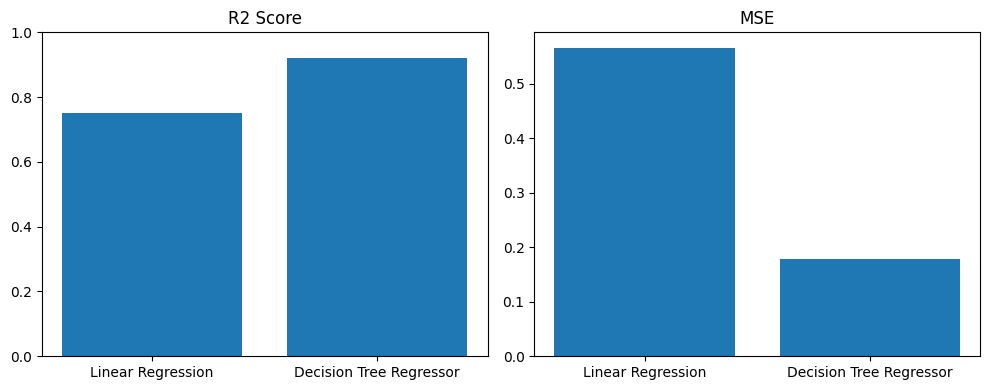

In [ ]:
# Convert dict results to DataFrame for better visualization
df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model', 'R2': 'R2'})

# Short visual comparison
def plot_results(df):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].bar(df['Model'], df['R2']) # Plot R2 scores
    ax[0].set_title('R2 Score')
    ax[0].set_ylim(0, 1) # Set y-axis limit for better visibility

    ax[1].bar(df['Model'], df['MSE']) # Plot MSE
    ax[1].set_title('MSE')

    plt.tight_layout()
    plt.show()

# Call the function
plot_results(df)

- __Analyze Feature Importance__

In [801]:
# Feature Importance for Decision Tree Regressor(only for tree based models)
feature_importance = models['Decision Tree Regressor'].feature_importances_
feature_names = X_train.columns

# Show which features matter most for ratings
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Most Important Features:")
print(importance_df.head(5))

Most Important Features:
                feature  importance
1                 Votes    0.953915
5             City_freq    0.021543
0  Average Cost for two    0.009582
4   Has Online delivery    0.002886
2           Price range    0.001693


- Summary
    - Votes: By far the most important feature (95%+), highlighting how customer engagement drives rating predictions.
    - City Frequency: Modest impact, possibly tied to location-based preferences.
    - Cost, Online Delivery, Price Range: Minor contributors with limited influence on ratings.

-----

- __Key Insights & Interpretation__

    - BEST MODEL: Decision Tree Regressor
        - R² Score: 0.9215 (92.15% variance explained)
        - RMSE: 0.4222 (average prediction error ±0.42)
        - Significantly outperforms Linear Regression

    - MODEL COMPARISON
        - Decision Tree: Captures non-linear relationships effectively
        - Linear Regression: Simple baseline, but limited by linearity
        - Decision Tree shows ~84% improvement in R²

    - BUSINESS IMPLICATIONS
        - High-accuracy predictions can inform rating strategy
        - Restaurant owners can estimate potential performance
        - Key influencing factors:
        - Customer **votes**
            - **Online services** (table booking & delivery)
            - **Cost strategy**: Tuning average pricing for impact

    - STRATEGIC RECOMMENDATIONS
        - **Pricing Strategy**: Optimize 'Average Cost for two' for target ratings  
        - **Digital Presence**: Implement online delivery and table booking  
        - **Customer Engagement**: Encourage more ratings and reviews  
        - **Cuisine Focus**: Specialize in popular cuisine types per city  
        - **Location Analysis**: Use city & locality trends to inform expansion  
        - **Continuous Monitoring**: Predict rating shifts with updated inputs

    - PROJECT PIPELINE
        - __Data Preprocessing:__ Handled missing values and cleaned columns  
        - __Feature Engineering:__ Top-N cuisines, frequency encoding for cities
        - __Standardization:__ Scaled numeric features to improve model performance and interpretability
        - __Model Training:__ Linear Regression & Decision Tree Regressor  
        - __Evaluation:__ Metrics including R², MSE, MAE, and RMSE  
        - __Feature Importance:__ Identified votes as top predictor  
        - __Business Takeaways:__ Generated actionable recommendations



- Save the model

In [ ]:
import pickle

# Save the trained Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file: # wb mode for writing binary files
    pickle.dump(trained_models['Decision Tree Regressor'], file)

- Load the model and test prediction

In [ ]:
# Load the model
with open('decision_tree_model.pkl', 'rb') as file: # rb mode for reading binary files
    loaded_model = pickle.load(file)

# Select a test sample and predict
sample = X_test_scaled.iloc[[0]] # Use the first row of the test set
predicted = loaded_model.predict(sample) # Predict the rating for the sample

# Compare with actual rating
print(f"Predicted Rating: {predicted[0]:.2f}") # Print predicted rating
print(f"Actual Rating: {y_test.iloc[0]:.2f}")  # Print actual rating for comparison

Predicted Rating: 3.20
Actual Rating: 3.30


*Sample prediction validated: Model output closely matches real-world rating.*